In [ ]:
import pandas as pd
data=pd.read_csv("ds_salaries.csv")
data.head()

,work_year,experience_level,job_title,salary,remote_ratio,company_size
0,2023,3,Analytics Engineering Manager,399880,50,3
1,2024,3,Data Analytics Lead,398900,0,2
2,2024,3,Data Analytics Lead,398900,0,2
3,2024,4,Data Engineer,394000,100,2
4,2023,3,Machine Learning Engineer,392000,0,2


In [ ]:
data.shape

(19472, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19472 entries, 0 to 19471
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         19472 non-null  int64 
 1   experience_level  19472 non-null  int64 
 2   job_title         19472 non-null  object
 3   salary            19472 non-null  int64 
 4   remote_ratio      19472 non-null  int64 
 5   company_size      19472 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 912.9+ KB


In [ ]:
data.isnull().sum()

work_year           0
experience_level    0
job_title           0
salary              0
remote_ratio        0
company_size        0
dtype: int64

In [ ]:
  data.job_title.unique()

array(['Analytics Engineering Manager', 'Data Analytics Lead',
       'Data Engineer', 'Machine Learning Engineer', 'Data Scientist',
       'Data Infrastructure Engineer', 'AI Engineer', 'Research Engineer',
       'Data Analyst', 'Research Scientist', 'Data Architect',
       'Applied Data Scientist', 'Machine Learning Software Engineer',
       'Data Science Tech Lead', 'Head of Machine Learning',
       'Analytics Engineer', 'Computer Vision Engineer',
       'Research Analyst', 'Data Lead', 'Applied Scientist',
       'Machine Learning Manager', 'Deep Learning Engineer',
       'AI Architect', 'Head of Data', 'Machine Learning Scientist',
       'Machine Learning Developer', 'Data Product Owner',
       'Business Intelligence', 'AI Developer',
       'Machine Learning Infrastructure Engineer',
       'Data Operations Engineer', 'Data Analytics Manager',
       'Robotics Software Engineer', 'Prompt Engineer', 'MLOps Engineer',
       'Lead Data Engineer', 'NLP Engineer',
       'Bu

In [ ]:
data.describe()

,work_year,experience_level,salary,remote_ratio,company_size
count,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000
mean,2023.349836,2.608874,149605.610723,29.976376,2.048942
std,0.707739,0.673847,63269.240003,45.481909,0.253815
min,2020.000000,1.000000,15000.000000,0.000000,1.000000
25%,2023.000000,2.000000,103977.000000,0.000000,2.000000
50%,2023.000000,3.000000,142200.000000,0.000000,2.000000
75%,2024.000000,3.000000,188500.000000,100.000000,2.000000
max,2024.000000,4.000000,399880.000000,100.000000,3.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
column = "job_title"
data2=data.copy()
data[column] = LabelEncoder().fit_transform(data[column])

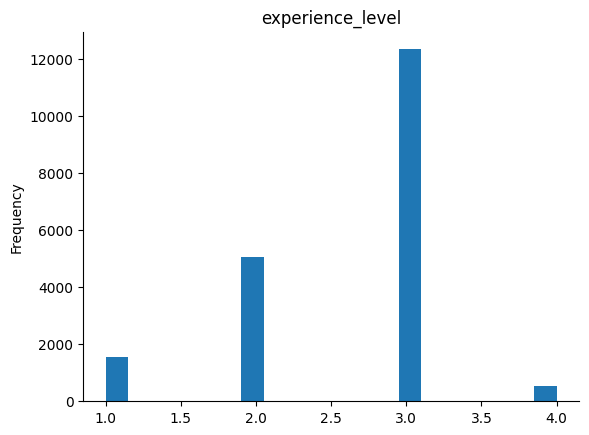

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data['experience_level'].plot(kind='hist', bins=20, title='experience_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

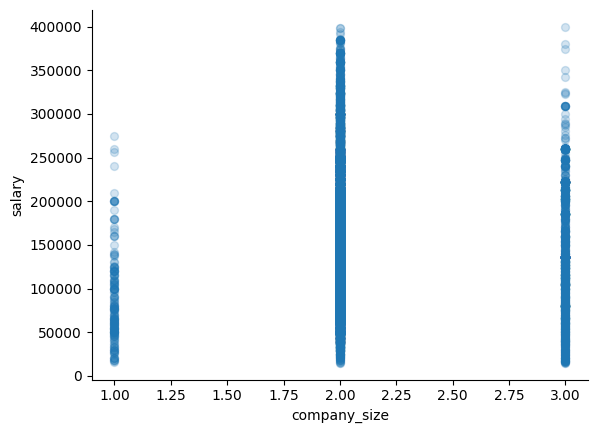

In [ ]:
data.plot(kind='scatter', x='company_size', y='salary', s=32, alpha=.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

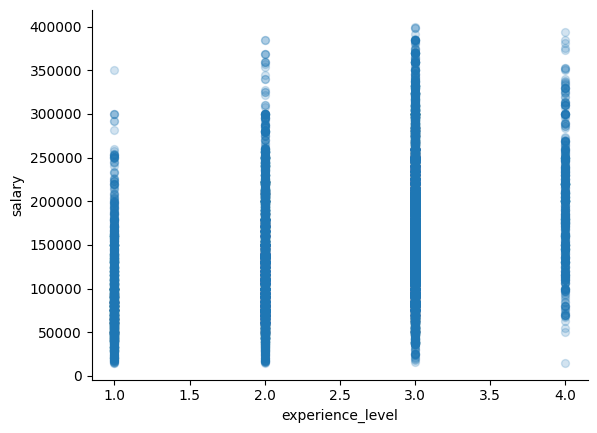

In [ ]:
data.plot(kind='scatter', x='experience_level', y='salary', s=32, alpha=.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

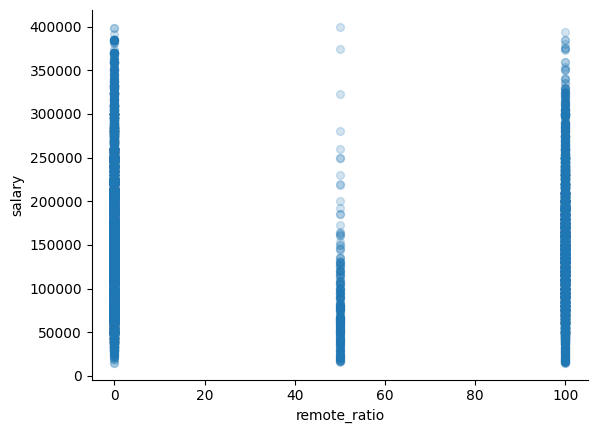

In [ ]:
data.plot(kind='scatter', x='remote_ratio', y='salary', s=32, alpha=.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

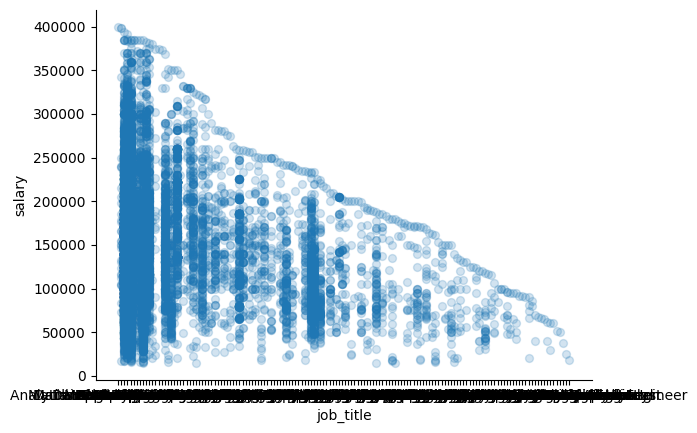

In [ ]:
data2.plot(kind='scatter', x='job_title', y='salary', s=32, alpha=.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

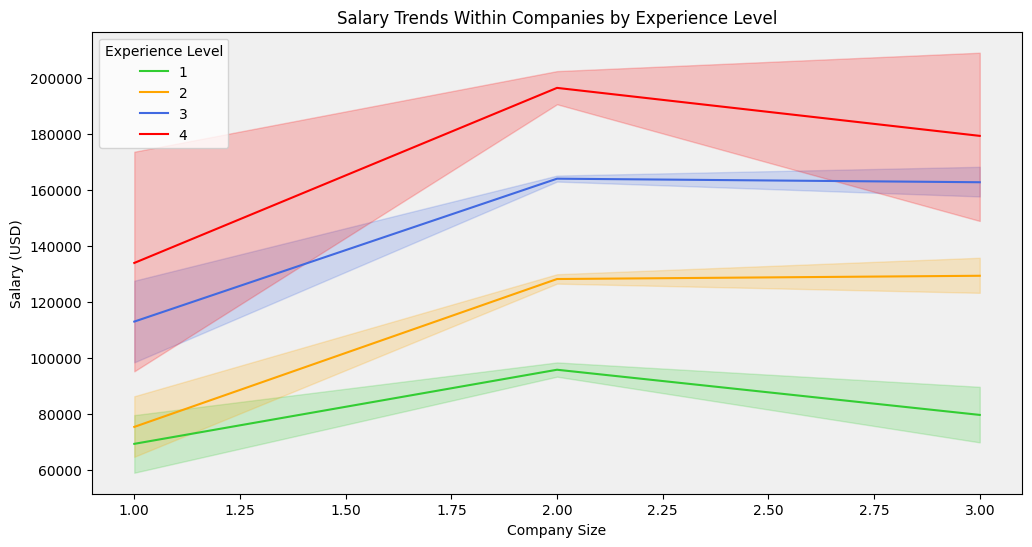

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('#f0f0f0')
sns.lineplot(x='company_size', y='salary', hue='experience_level', data=data, palette=['limegreen', 'orange', 'royalblue', 'red'])
plt.title('Salary Trends Within Companies by Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.legend(title='Experience Level', loc='upper left')
plt.show()

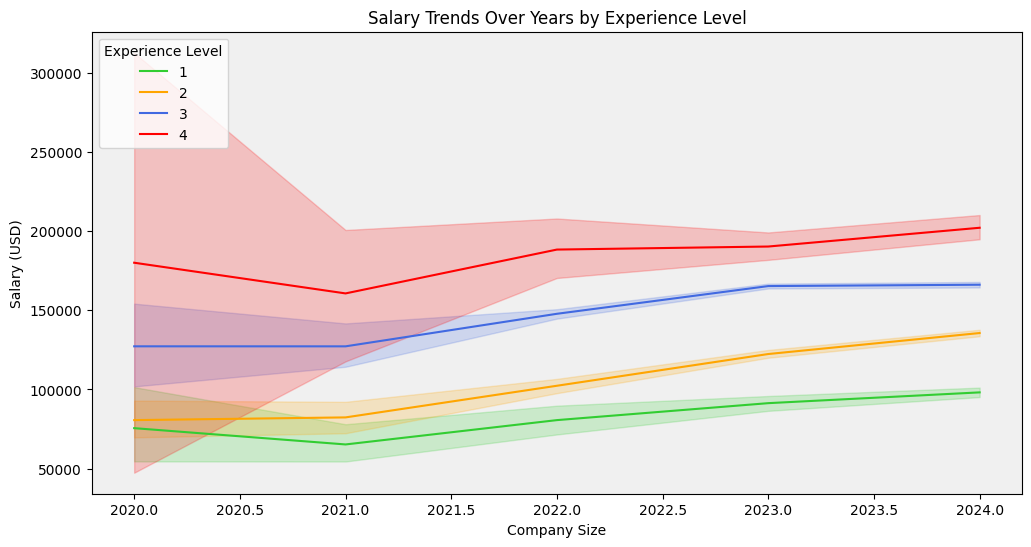

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('#f0f0f0')
sns.lineplot(x='work_year', y='salary', hue='experience_level', data=data, palette=['limegreen', 'orange', 'royalblue', 'red'])
plt.title('Salary Trends Over Years by Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.legend(title='Experience Level', loc='upper left')
plt.show()

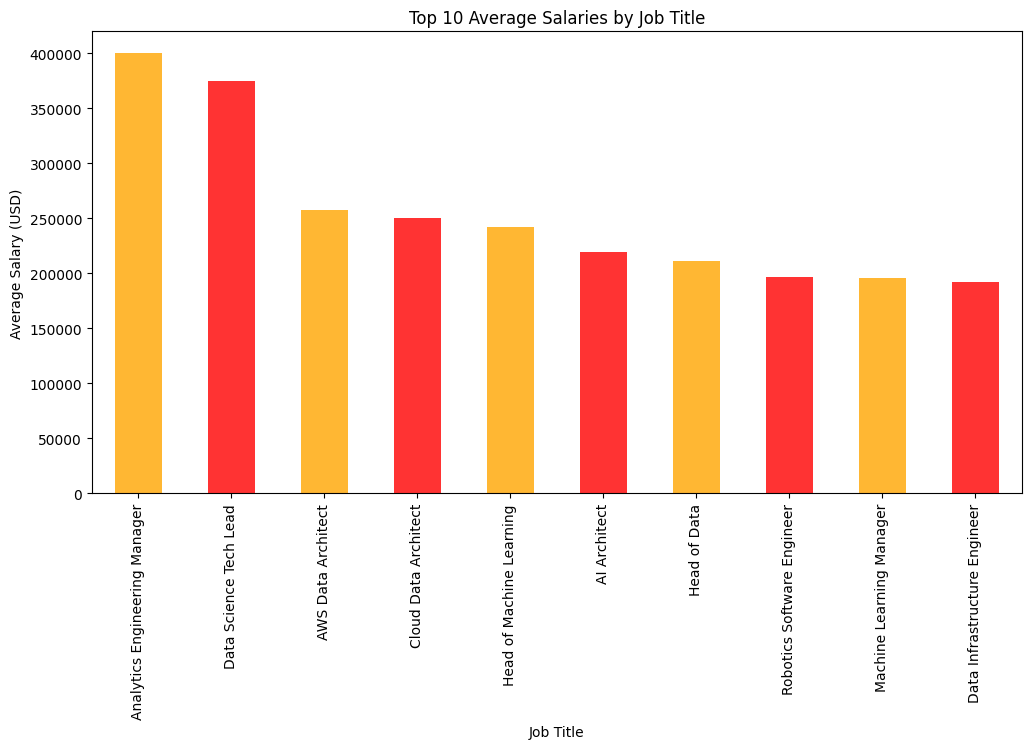

In [ ]:
plt.figure(figsize=(12, 6))
avg_salary_by_title = data2.groupby('job_title')['salary'].mean().sort_values(ascending=False)[:10]
avg_salary_by_title.plot(kind='bar', color=['orange','red'], alpha=0.8)
plt.title('Top 10 Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.show()

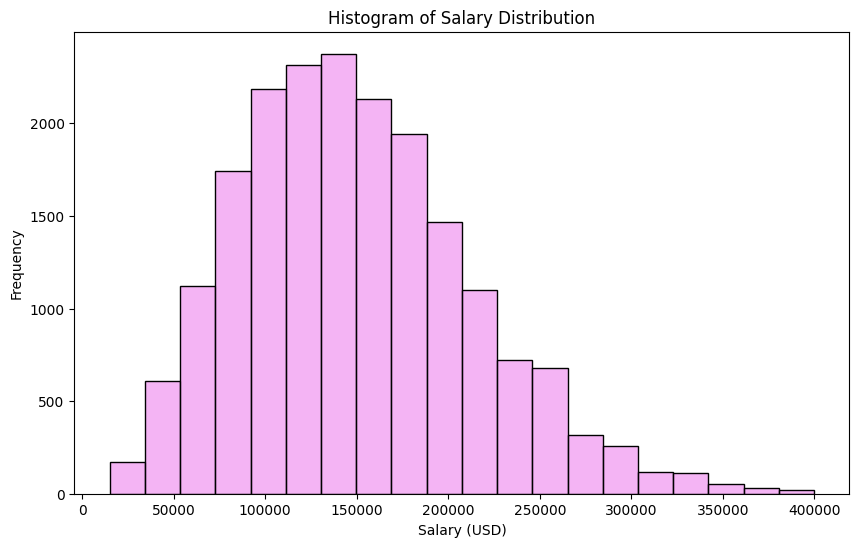

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], bins=20, color='violet', alpha=0.6)
plt.title('Histogram of Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import plotly.express as px
def draw_remote_donut_chart(remote_status):
    remote_counts = remote_status.value_counts()

    labels = ['Fully Remote', 'Hybrid', 'In Office']

    values = [remote_counts.get(100), remote_counts.get(50), remote_counts.get(0)]

    fig = px.pie(names=labels, values=values, hole=0.3, title='Remote Status Distribution')
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    fig = px.pie(names=labels, values=values, hole=0.3, title='Remote Status Distribution',
                 color_discrete_sequence=colors, opacity=0.7)
    fig.show()

remote_status = data["remote_ratio"]
draw_remote_donut_chart(remote_status)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = data.drop(columns=["salary"])
y = data["salary"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [ ]:

mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 42888.70968920991
Mean Squared Error (MSE): 3009479898.324688
Root Mean Squared Error (RMSE): 54858.72672897802
R-squared (R²): 0.27834023021082266


In [ ]:
error_rate = abs(y_test - y_test_pred)/y_test
accuracy = 1 - error_rate

X_test["salary"] = y
X_test["prediction"] = y_test_pred
X_test["accuracy"] = accuracy
X_test["error_rate"] = error_rate
X_test

,work_year,experience_level,job_title,remote_ratio,company_size,salary,prediction,accuracy,error_rate
987,2024,3,18,0,3,260000,190704.469510,0.733479,0.266521
7552,2024,3,111,0,2,160000,202098.462860,0.736885,0.263115
8356,2024,2,111,0,2,153040,172725.440577,0.871371,0.128629
18160,2024,3,54,0,2,64200,158100.189936,-0.462620,1.462620
18998,2024,1,46,0,2,47500,89962.799260,0.106046,0.893954
...,...,...,...,...,...,...,...,...,...
19014,2023,2,34,0,2,47238,108510.013336,-0.297092,1.297092
18812,2024,2,57,0,2,50000,126044.017140,-0.520880,1.520880
12776,2023,3,139,0,2,120000,202737.781384,0.310518,0.689482
18132,2023,3,77,0,2,64980,100872.766166,0.447634,0.552366


In [ ]:
overall_accuracy = X_test["accuracy"].mean()

print(f"overall accuracy: {overall_accuracy}")

overall accuracy: 0.6425989389553513


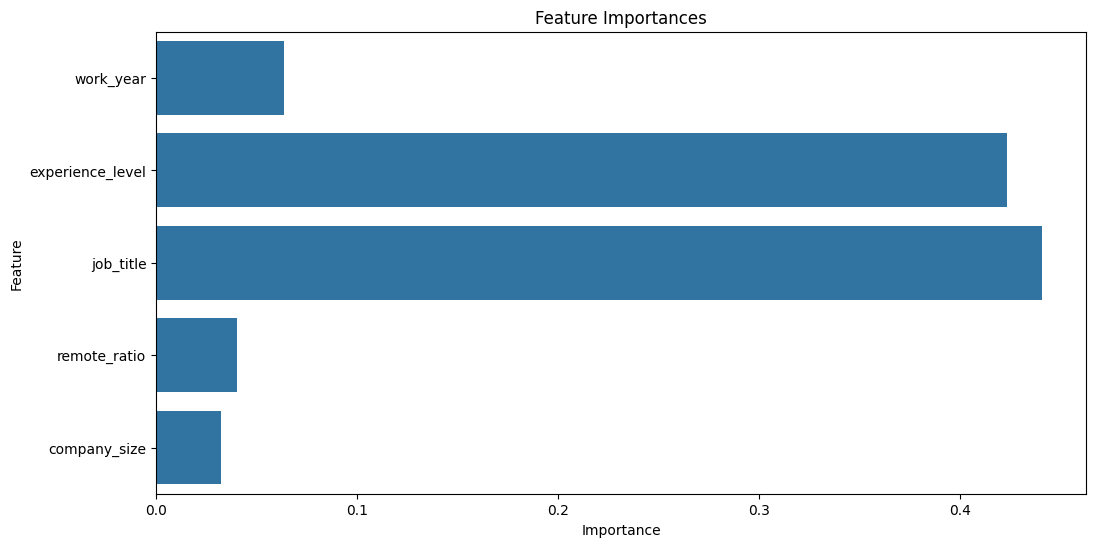

In [ ]:
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
#1+

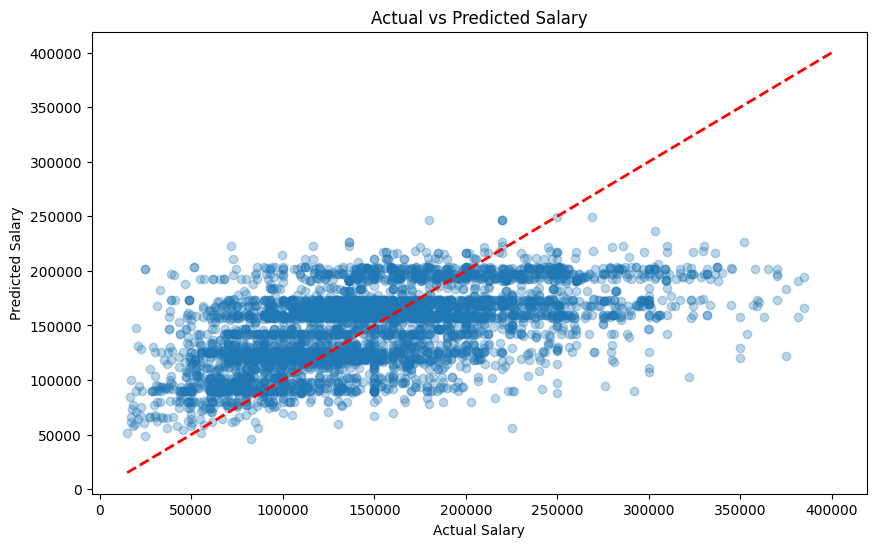

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()
#2+

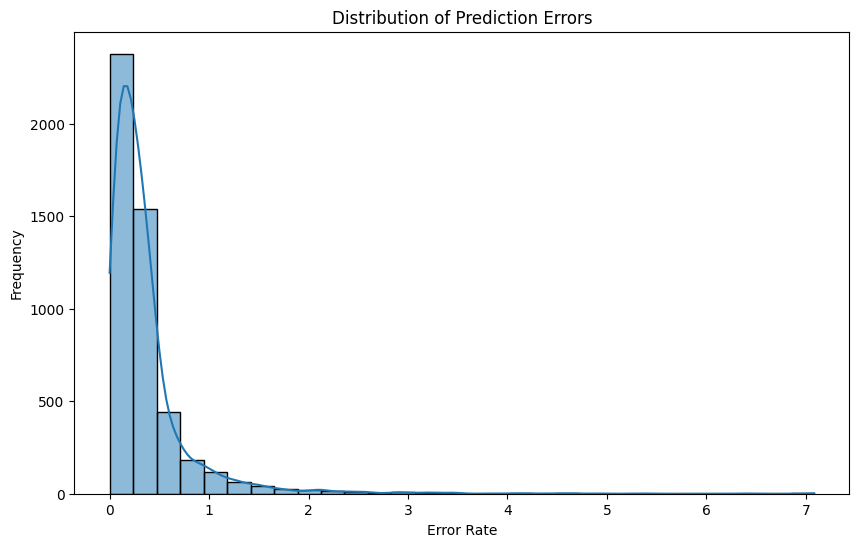

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(error_rate, bins=30, kde=True)
plt.xlabel("Error Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()
#4+

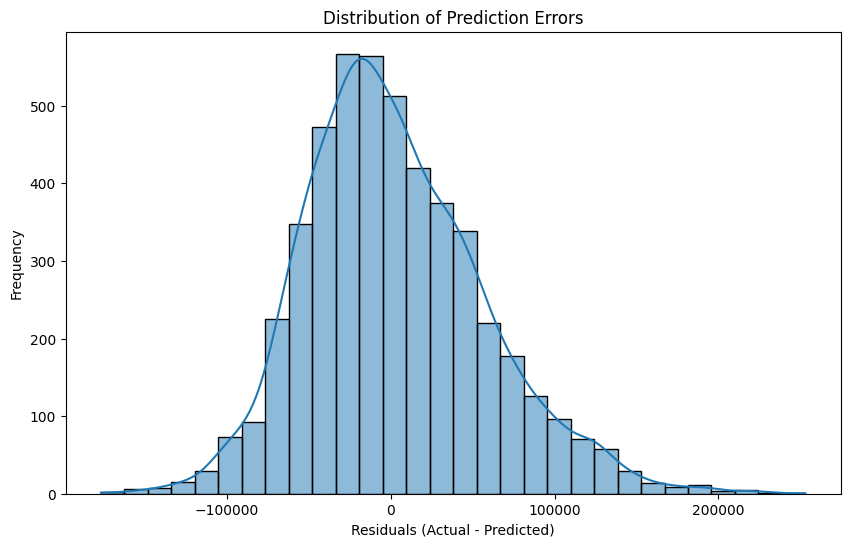

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()
#6+

<ipython-input-49-bf3bed143083>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-49-bf3bed143083>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




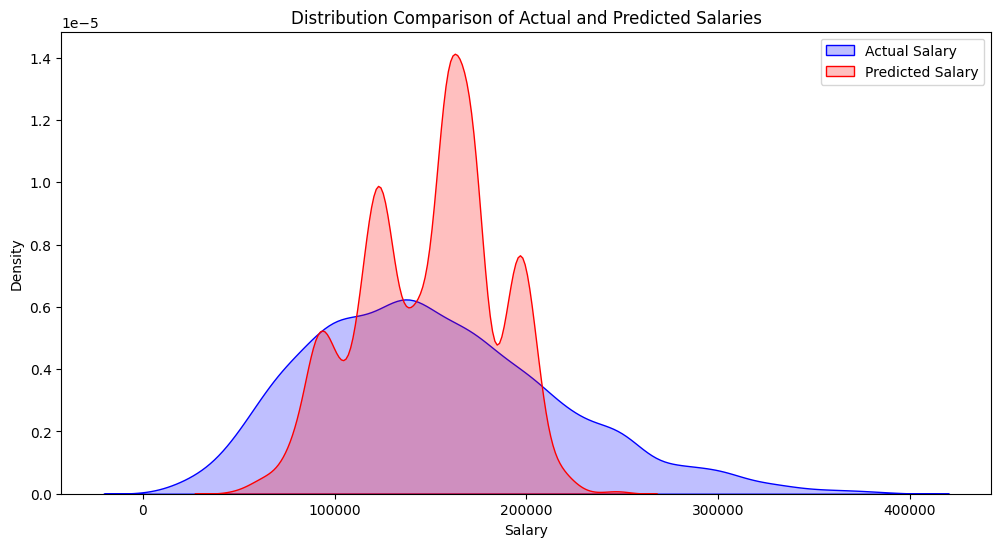

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, label="Actual Salary", color='blue', shade=True)
sns.kdeplot(y_test_pred, label="Predicted Salary", color='red', shade=True)
plt.xlabel("Salary")
plt.ylabel("Density")
plt.title("Distribution Comparison of Actual and Predicted Salaries")
plt.legend()
plt.show()
#17+

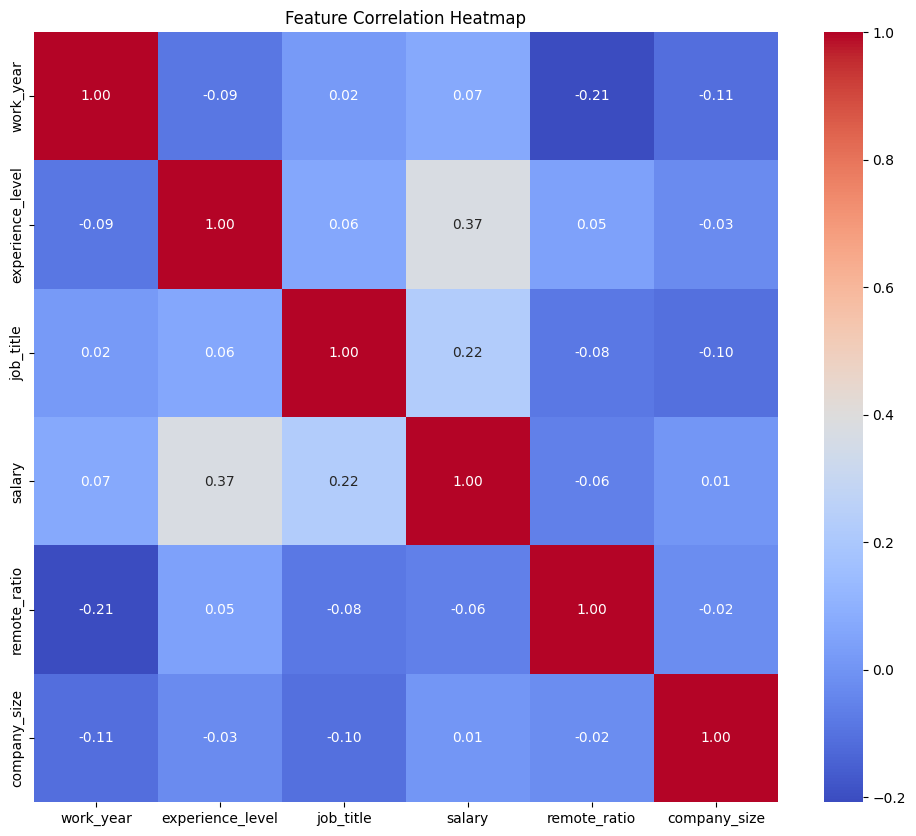

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
#16+

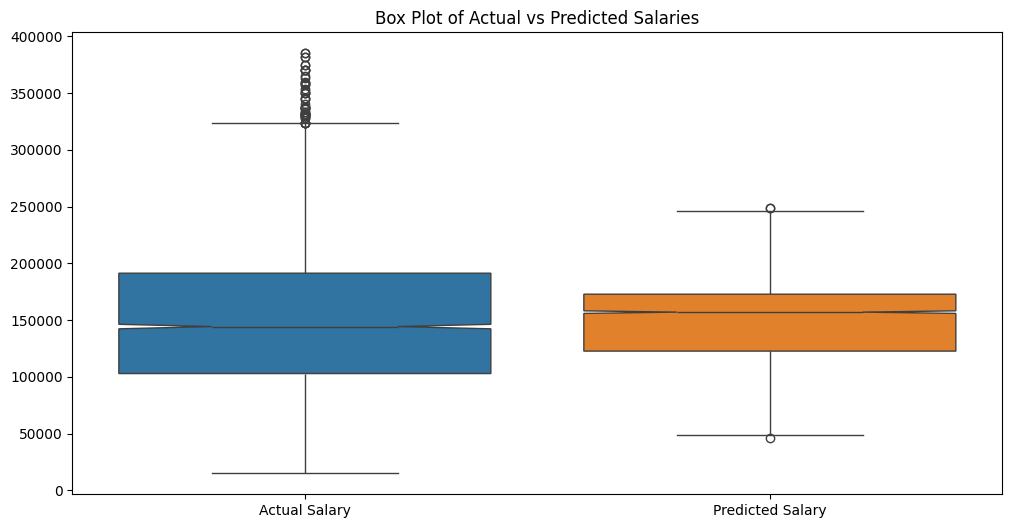

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[y_test, y_test_pred], notch=True)
plt.xticks([0, 1], ['Actual Salary', 'Predicted Salary'])
plt.title("Box Plot of Actual vs Predicted Salaries")
plt.show()
#10+

<ipython-input-52-ba713649ec0b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-ba713649ec0b>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



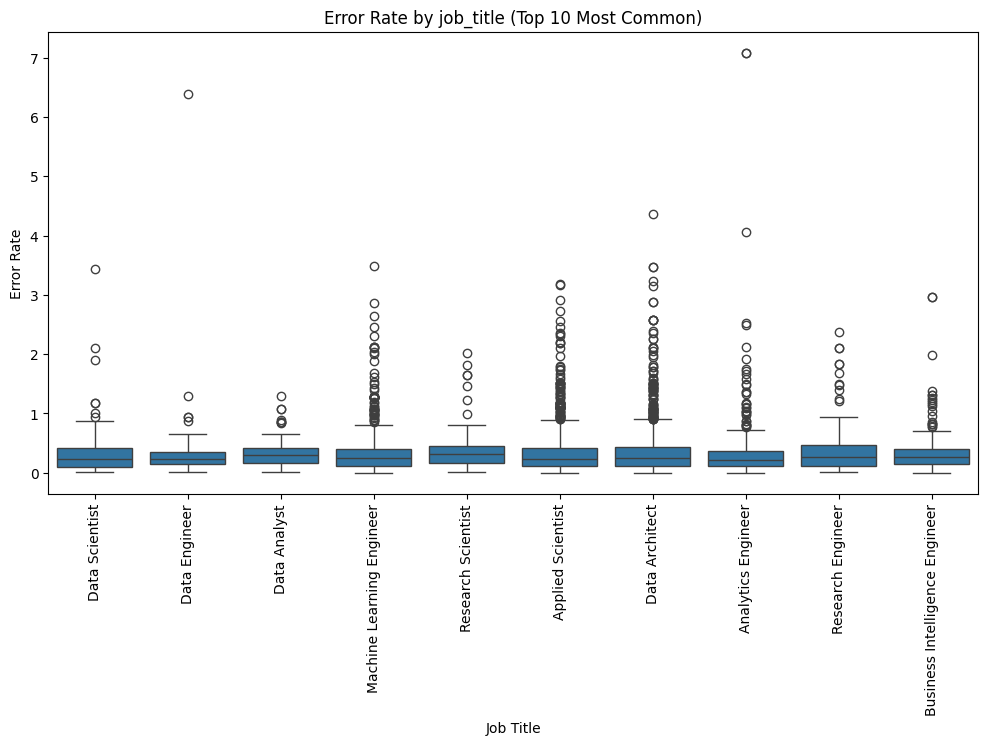

In [ ]:
top_10_jobs = data2['job_title'].value_counts().nlargest(10).index
top_10_jobs_array = top_10_jobs.values
top_10_jobs2 = data['job_title'].value_counts().nlargest(10).index

filtered_data = X_test[X_test['job_title'].isin(top_10_jobs2)]

filtered_data['Error Rate'] = abs(filtered_data['salary'] - filtered_data['prediction']) / filtered_data['salary']

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=filtered_data[feature_to_plot], y=filtered_data['Error Rate'])
ax.set_xticklabels(top_10_jobs_array, rotation=90)
plt.xlabel("Job Title")
plt.ylabel("Error Rate")
plt.title(f"Error Rate by {feature_to_plot} (Top 10 Most Common)")
plt.show()
#20+